#Utilizando biblioteca Minisom

##Importar datasets

Importe algum dataset de classificação de sua escolha. Algumas sugestões de datasets do sklearn são:


* Dataset de classificação de flores:
  * from sklearn.datasets import load_iris
* Dataset de predição de tumores usando dados computados a partir de imagens
  * from sklearn.datasets import load_breast_cancer
* Dataset de classificação de vinhos
  * from sklearn.datasets import load_wine




## Carregar Dataset

Carrege o dataset em uma variável e divida em X e y (data e target). Lembre também de salvar as labels da tabela

In [2]:
# Importação do dataset
from sklearn.datasets import load_wine

# Carregamento do dataset
data = load_wine()
X = data.data
y = data.target

# Labels das classes
labels = data.target_names
print(f'Classes: {labels}')
print(f'Dados (X) shape: {X.shape}')
print(f'Target (y) shape: {y.shape}')

Classes: ['class_0' 'class_1' 'class_2']
Dados (X) shape: (178, 13)
Target (y) shape: (178,)


##Normalização dos dados

Utilizando as funções MinMaxScaler() e fit_transform(), realize a normalização dos dados de entrada (X) de forma que os valores fiquem entre 0 e 1

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Normalização dos dados de entrada
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(f'Dados normalizados (X_scaled) shape: {X_scaled.shape}')

Dados normalizados (X_scaled) shape: (178, 13)


## Aplicar SOM

Utilize a função MiniSom() para aplicar o SOM para classificação dos dados

OBS: Parâmetros
* x e y: largura e altura da grid, respectivamente
* input_len: número de entradas da rede neural de classificação
* sigma: raio da vizinhança de influência dos neurônios vencedores
* learning_rate: taxa de aprendizado. O quanto os neurônios se ajustam a cada iteração

In [4]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=512ba4803a887a686120714fd742e22823acb9dfc0531fbb638c62a227d37e15
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [5]:
# Importação da MiniSom
from minisom import MiniSom

# Parâmetros do SOM
x_dim, y_dim = 10, 10  # Dimensões do grid
input_len = X.shape[1]  # Número de entradas do SOM (número de features em X)
sigma = 1.0             # Raio de vizinhança
learning_rate = 0.5     # Taxa de aprendizado

# Inicialização do SOM
som = MiniSom(x=x_dim, y=y_dim, input_len=input_len, sigma=sigma, learning_rate=learning_rate)


##Inicializar os pesos

Aplique a função random_weights_init() no som para aplicar os pesos de forma aleatória. Defina o intervalo dos dados corretamente, passando X_scaled como parâmetro

In [6]:
# Inicialização dos pesos do SOM
som.random_weights_init(X_scaled)
print("Pesos inicializados aleatoriamente.")

Pesos inicializados aleatoriamente.


##Treinar SOM

utilize a função train_random para treinar o SOM. A função recebe como parâmetros:

* Dados de treinamento
* num_iteration: Quantidade de iterações que será realizada

In [7]:
# Número de iterações
num_iterations = 1000

# Treinamento do SOM
som.train_random(data=X_scaled, num_iteration=num_iterations)
print("Treinamento concluído.")

Treinamento concluído.


## Customizar representação do SOM


Etapa opcional. Você pode configurar cores ou formas geométricas para cada classe. Exemplo:

In [8]:
import numpy as np

# Definição de cores e marcadores
colors = ['r', 'g', 'b']  # Vermelho, Verde, Azul para cada classe
markers = ['o', 's', 'D']  # Círculo, Quadrado, Diamante para cada classe

##Plotar mapa SOM

Percorra toda a matriz, encontrando o vencedor para cada bloco do mapa. Para cada amostra de X_scaled, encontramos o neurônio vencedor no SOM (winner = som.winner(x)).

Utilize plt.plot para desenhar a classe vencedora no mapa. Utilize aqui as cores ou marcadores, caso tenha optado por isso. Utilize os parâmetros:

* markerfacecolor='None', para deixar a marcação original invisivel, e poder aplicar as customizadas
* markeredgecolors=colors[y[i]] para definir a cor das bordas conforme definido anteriormente
*markersize e markeredgewidth para tamanho e espessura da borda das formas geométricas

OBS: É possível que um bloco da grid tenha 2 winners. Faça com que escolha um deles apenas, para não sobrepor a imagem

##Criação da grid e titulo + exibição do gráfico

Crie as bordas de cada bloco da grid conforme abaixo

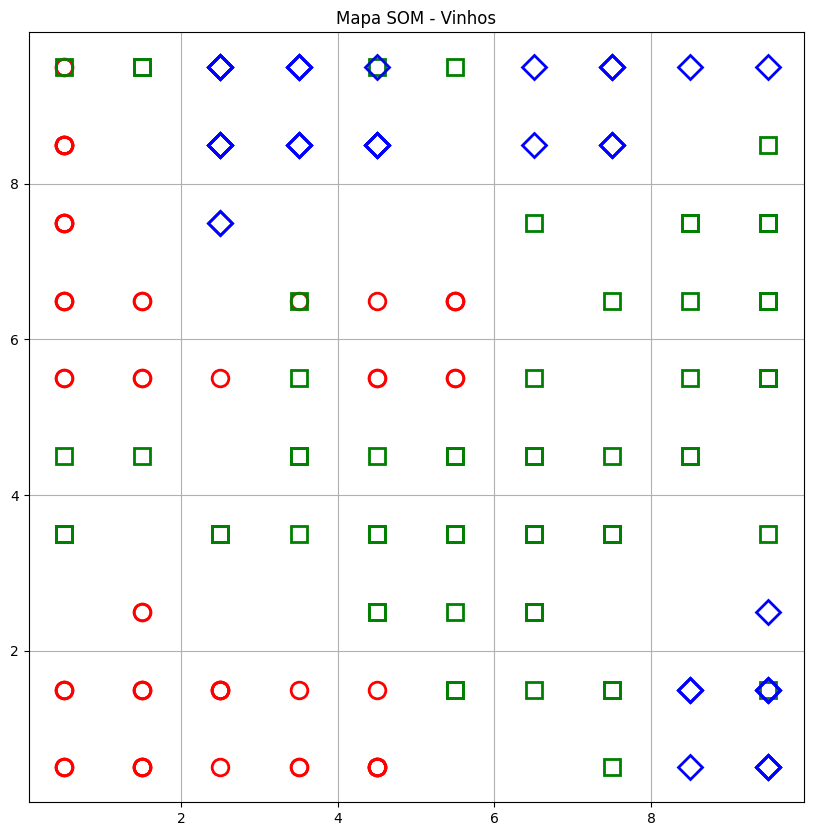

In [11]:
import matplotlib.pyplot as plt

# Plot do mapa SOM
plt.figure(figsize=(10, 10))

for i, x in enumerate(X_scaled):
    # Encontrar o vencedor para cada amostra
    winner = som.winner(x)
    plt.plot(winner[0] + 0.5, winner[1] + 0.5,
             markers[y[i]],
             markerfacecolor='None',
             markeredgecolor=colors[y[i]],
             markersize=12,
             markeredgewidth=2)

# Configuração da grid e título
plt.title('Mapa SOM - Vinhos')
plt.grid(True)
plt.show()

##Resultado esperado

Seu resultado terá um formato parecido com este:

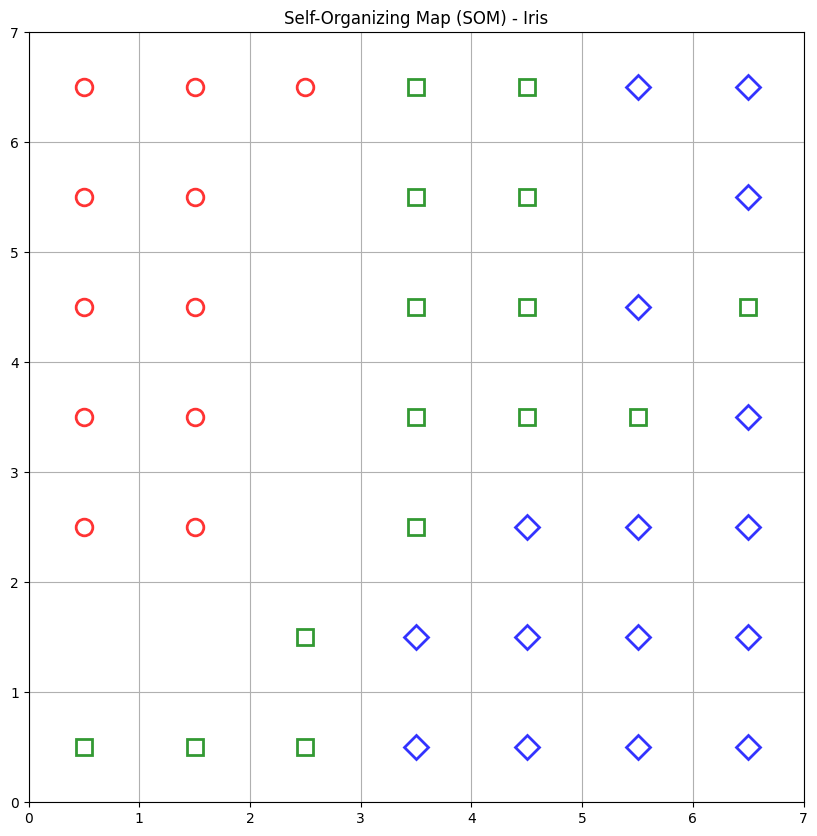

#Sem Bibliotecas

##Preparação dos dados

Nessa Etapa, você irá escolher um conjunto de dados do kaggle e realizará a preparação dos dados

Dica: Separe em X e y, e utilize o MinMaxScaler()

In [23]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

# Carregar o dataset de vinhos
data = load_wine()
X = data.data
y = data.target

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Calculo da Distância Euclidiana

Calcular a distância entre uma amostra de entrada e os neurônios do SOM (distância entre X e y).  A distância Euclidiana mede a similaridade entre uma amostra e os neurônios no SOM. Essa função é essencial para encontrar o neurônio vencedor

In [24]:
import numpy as np

# Função para calcular a distância Euclidiana
def euclidean_distance(x, w):
    return np.sqrt(np.sum((x - w) ** 2))

##Econtrar Neurônio Vencedor

Identificar o neurônio no SOM cuja distância é a menor para a amostra de entrada. O BMU (Neurônio Vencedor) é o neurônio mais próximo da amostra em termos de distância. Encontrar o BMU é uma das etapas principais do SOM, pois serve  para atualizar os pesos e ajustá-los à amostra

In [25]:
# Função para encontrar o neurônio vencedor (BMU)
def find_bmu(x, som_weights):
    min_dist = np.inf
    bmu_idx = None

    # Percorrer todos os neurônios no grid para encontrar o BMU
    for i in range(som_weights.shape[0]):
        for j in range(som_weights.shape[1]):
            w = som_weights[i, j, :]
            dist = euclidean_distance(x, w)
            if dist < min_dist:
                min_dist = dist
                bmu_idx = (i, j)

    if bmu_idx is None:
        print(f"Erro: BMU não encontrado para a amostra {x}. Verifique os dados de entrada e inicialização dos pesos.")
        raise ValueError("BMU não encontrado.")

    print(f"BMU encontrado: {bmu_idx} com distância {min_dist}")
    return bmu_idx, min_dist

## Atualização dos Pesos dos Neurônios

Ajustar os pesos dos neurônios vencedores e seus vizinhos para que a rede SOM aprenda o padrão dos dados.  Nesta etapa, não apenas o BMU, mas também os neurônios vizinhos a ele são ajustados, criando uma resposta organizada e suavizada para os dados.

In [26]:
# Função para atualizar os pesos dos neurônios
def update_weights(x, som_weights, bmu_idx, learning_rate, sigma):
    for i in range(som_weights.shape[0]):
        for j in range(som_weights.shape[1]):
            # Calcular a distância entre o neurônio e o BMU
            dist_to_bmu = np.sqrt((i - bmu_idx[0]) ** 2 + (j - bmu_idx[1]) ** 2)

            # Atualizar os pesos se o neurônio estiver dentro do raio de influência
            if dist_to_bmu <= sigma:
                influence = np.exp(-dist_to_bmu**2 / (2 * (sigma ** 2)))
                som_weights[i, j, :] += learning_rate * influence * (x - som_weights[i, j, :])

## Treinamento da Rede SOM

Treinar o SOM para mapear as amostras de entrada nos neurônios do grid.  O treinamento permite que o SOM aprenda padrões nos dados, ajustando os pesos dos neurônios para formar agrupamentos que representem diferentes tipos de dados

In [27]:
# Função para treinar o SOM
def train_som(X, som_weights, num_iterations, learning_rate, sigma):
    for iteration in range(num_iterations):
        # Seleciona uma amostra aleatória do dataset
        random_idx = np.random.randint(0, X.shape[0])
        x = X[random_idx]

        # Encontrar o BMU para a amostra
        bmu_idx, _ = find_bmu(x, som_weights)

        # Atualizar os pesos dos neurônios
        update_weights(x, som_weights, bmu_idx, learning_rate, sigma)

        # Diminuir o learning rate e sigma ao longo do tempo
        learning_rate *= (1 - iteration / num_iterations)
        sigma *= (1 - iteration / num_iterations)

# Inicialização dos pesos do SOM dentro do intervalo [0, 1]
grid_shape = (10, 10)
som_weights = np.random.rand(grid_shape[0], grid_shape[1], X_scaled.shape[1])

# Treinamento do SOM
num_iterations = 100
train_som(X_scaled, som_weights, num_iterations, learning_rate=0.5, sigma=1.0)
print("Treinamento do SOM concluído.")

BMU encontrado: (1, 4) com distância 0.8464120920491895
BMU encontrado: (1, 4) com distância 0.6438738279672561
BMU encontrado: (1, 4) com distância 0.5561571839171517
BMU encontrado: (3, 3) com distância 0.7392154908592266
BMU encontrado: (3, 4) com distância 0.6849940885555253
BMU encontrado: (3, 3) com distância 0.670643689400218
BMU encontrado: (9, 8) com distância 0.7703355398179504
BMU encontrado: (3, 3) com distância 0.3676970883286618
BMU encontrado: (3, 3) com distância 0.5621799940196172
BMU encontrado: (1, 4) com distância 0.41797806823043937
BMU encontrado: (1, 4) com distância 0.285187900209594
BMU encontrado: (3, 3) com distância 0.35127637314934784
BMU encontrado: (3, 3) com distância 0.35987603021480685
BMU encontrado: (9, 8) com distância 0.4397546213616485
BMU encontrado: (2, 9) com distância 0.6838151930704071
BMU encontrado: (3, 3) com distância 0.7797764673253496
BMU encontrado: (1, 4) com distância 0.3409001095012359
BMU encontrado: (3, 3) com distância 0.47001659

##Visualização dos Resultados

Visualizar o SOM e a organização dos clusters no grid após o treinamento.

BMU encontrado: (1, 4) com distância 0.4600318413567691
BMU encontrado: (1, 4) com distância 0.5997785463254984
BMU encontrado: (1, 4) com distância 0.4305133428462061
BMU encontrado: (1, 4) com distância 0.35712006396681334
BMU encontrado: (2, 4) com distância 0.4151767927289349
BMU encontrado: (1, 4) com distância 0.2954110344719513
BMU encontrado: (1, 4) com distância 0.46568220176800745
BMU encontrado: (1, 4) com distância 0.5015055615014481
BMU encontrado: (1, 4) com distância 0.4797519394690068
BMU encontrado: (1, 4) com distância 0.3244588834200727
BMU encontrado: (1, 4) com distância 0.33852749653865166
BMU encontrado: (1, 4) com distância 0.5298540229956238
BMU encontrado: (1, 4) com distância 0.4105358319089739
BMU encontrado: (1, 4) com distância 0.6881325628990629
BMU encontrado: (1, 4) com distância 0.5162531306972776
BMU encontrado: (1, 4) com distância 0.41353220646852235
BMU encontrado: (1, 4) com distância 0.4058982402547609
BMU encontrado: (2, 4) com distância 0.45142

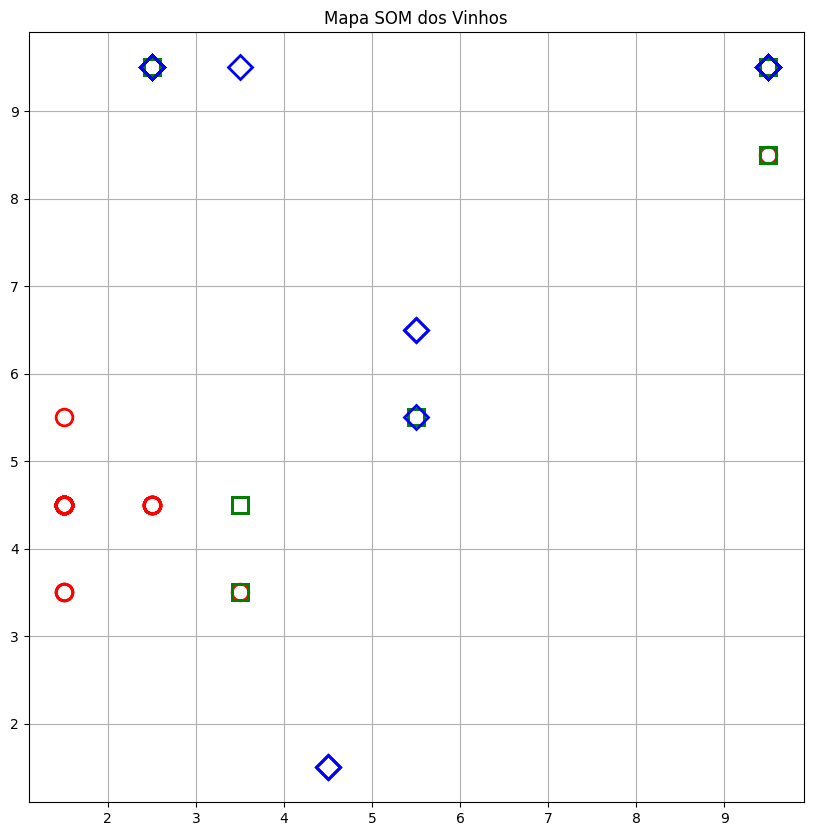

In [28]:
import matplotlib.pyplot as plt

# Visualizar os clusters no SOM após o treinamento
plt.figure(figsize=(10, 10))

# Definir cores e marcadores para cada classe
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

for i, x in enumerate(X_scaled):
    bmu_idx, _ = find_bmu(x, som_weights)
    plt.plot(bmu_idx[0] + 0.5, bmu_idx[1] + 0.5,
             markers[y[i]],
             markerfacecolor='None',
             markeredgecolor=colors[y[i]],
             markersize=12,
             markeredgewidth=2)

# Configuração do grid e título
plt.title("Mapa SOM dos Vinhos")
plt.grid(True)
plt.show()